<a href="https://colab.research.google.com/github/marquesGus/vinhosMachineLearning/blob/main/Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boa noite professor, nosso humilde projeto consiste em dizer o tipo de vinho com base em algumas informações descritivas:

*   Acidez
*   Acido Citrico
*   Densidade
*   Ph
*   Alcool

Entre outros...

Nosso sistema ira nos dizer se o vinho é um **VINHO TINTO** ou **VINHO BRANCO**

Os integrantes do grupo são: 

*   GUSTAVO ROGERIO SILVA MARQUES - **RA**: 3018102371
*   GISELE LEMES PALMIRO - **RA**: 3019202857
*   MARCOS VINICIUS FRANÇA - **RA**: 3018104667
*   VALDEMAR DOS SANTOS PEREIRA NETO - **RA**: 3018100730







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leitura de dados com pandas

In [ ]:
urlDataFrame = 'https://raw.githubusercontent.com/marquesGus/vinhosMachineLearning/main/wine_dataset.csv'
vinhos = pd.read_csv(urlDataFrame)


In [ ]:
vinhos.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Figuras que mostrem insights sobre os dados com pandas e matplotlib

Aqui vemos o valor **médio**, **maximo** e **minimo** da porcentagem de alcool no nosso dateset de vinhos.

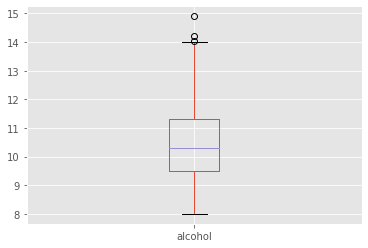

In [ ]:
vinhos.boxplot(column='alcohol')

Aqui, vemos as mesmas informacoes mas agora sobre a qualidade dos vinhos, separados pelo tipo

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


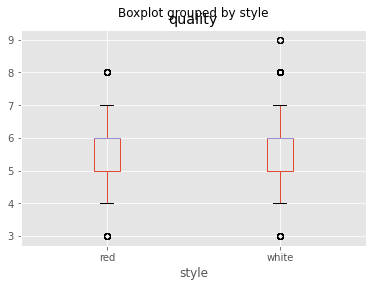

In [ ]:
vinhos.boxplot(column='quality', by='style')

# Manipulação e limpeza de dados com pandas

In [ ]:
vinhos = vinhos.sort_values(by=['quality'])

Para um melhor desenvolvimento, os dados da coluna **"STYLE"** transformarei os dados sendo o vinho tinto(**red**) = 0 e branco(**white**) = 1

In [ ]:
vinhos['style'] = vinhos['style'].replace('red',0)

In [ ]:
vinhos['style'] = vinhos['style'].replace('white',1)

In [ ]:
y = vinhos['style']
x = vinhos.drop('style', axis = 1)

# Quebrar os dados em conjunto de treino e conjunto de teste

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.33, random_state=42)

# Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador) no conjunto de treino

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier()
modelo.fit(x_treino, y_treino)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

# Verificar o desempenho do estimador do scikit-learn no conjunto de teste

In [ ]:
resultado = modelo.score(x_teste, y_teste)
print("Score:", resultado)

Score: 0.9972027972027973


**Esses sao os conjuntos que iremos tentar prever....**

Os respectivos tipos de vinhos são:


In [ ]:
y_teste[200:203]

413     0
6424    1
6299    1
Name: style, dtype: int64

Seus dados:

In [ ]:
x_teste[200:203]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
413,9.9,0.40,0.53,6.7,0.097,6.0,19.0,0.99860,3.27,0.82,11.7,7
6424,6.0,0.34,0.29,6.1,0.046,29.0,134.0,0.99462,3.48,0.57,10.7,6
6299,6.8,0.30,0.33,12.8,0.041,60.0,168.0,0.99659,3.10,0.56,9.8,5


Agora, veremos se o nosso modelo conseguira prever quais sao os tipos dos vinhos impressos anteriormente.


In [ ]:
previsoes = modelo.predict(x_teste[200:203])

In [ ]:
previsoes

array([0, 1, 1])